In [1]:
import pandas
import requests
import geopandas
from shapely.geometry import Point

In [2]:
%matplotlib inline

In [3]:
with open("geo.key") as f:
    password = f.read().strip()
url = f"https://maps.googleapis.com/maps/api/geocode/json?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA&key={password}"
r = requests.get(url)
r.raise_for_status()
r.json()

{'results': [{'address_components': [{'long_name': '1600',
     'short_name': '1600',
     'types': ['street_number']},
    {'long_name': 'Amphitheatre Parkway',
     'short_name': 'Amphitheatre Pkwy',
     'types': ['route']},
    {'long_name': 'Mountain View',
     'short_name': 'Mountain View',
     'types': ['locality', 'political']},
    {'long_name': 'Santa Clara County',
     'short_name': 'Santa Clara County',
     'types': ['administrative_area_level_2', 'political']},
    {'long_name': 'California',
     'short_name': 'CA',
     'types': ['administrative_area_level_1', 'political']},
    {'long_name': 'United States',
     'short_name': 'US',
     'types': ['country', 'political']},
    {'long_name': '94043', 'short_name': '94043', 'types': ['postal_code']}],
   'formatted_address': '1600 Amphitheatre Pkwy, Mountain View, CA 94043, USA',
   'geometry': {'location': {'lat': 37.4217404, 'lng': -122.0857054},
    'location_type': 'ROOFTOP',
    'viewport': {'northeast': {'lat': 

In [4]:
r.json()["results"][0]["geometry"]["location"]

{'lat': 37.4217404, 'lng': -122.0857054}

In [5]:
def get_geo_df(addrs=[]):
    rows = []
    for addr in addrs:
        url = f"https://maps.googleapis.com/maps/api/geocode/json?address={addr}&key={password}"
        r = requests.get(url)
        r.raise_for_status()
        coords = r.json()["results"][0]["geometry"]["location"]
        rows.append({
            "addr":addr,
            "loc": Point(coords["lng"], coords["lat"])
        })
    return geopandas.GeoDataFrame(rows, geometry="loc")
    
df = get_geo_df([
    "Wisconsin State Capitol",
    "1210 W. Dayton St., Madison, WI",
])

In [6]:
# !wget https://opendata.arcgis.com/datasets/db89adb17d414649a71c0f29ea73e5bf_6.zip -O city.zip

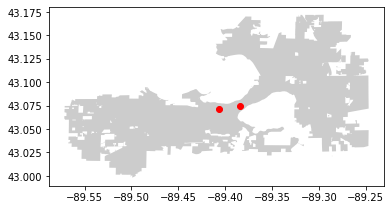

In [7]:
ax = geopandas.read_file("zip://city.zip").plot(color="0.8")
df.plot(ax=ax, color="red")